In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters


In [22]:
register_matplotlib_converters()

In [23]:
df = pd.read_csv('janvier.csv')
df['arb_timestamp'] = df['arb_timestamp'].astype('datetime64[ns]')
df= df.drop(['date','time','ID','arb_exch1','arb_exch2'],axis = 1)
df.arb_timestamp = pd.to_datetime(df.arb_timestamp)
df.head()

,arb_timestamp,arb_prc
0,2019-01-01 00:00:31,1.12
1,2019-01-01 00:00:31,0.30
2,2019-01-01 00:00:31,3.93
3,2019-01-01 00:00:31,0.22
4,2019-01-01 00:00:31,0.30


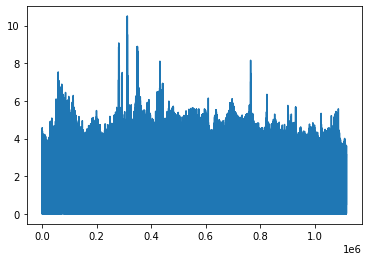

In [24]:
#plt.xlabel('Date')
#plt.ylabel('pourcentage de benefit')
#plt.plot(df)

arb_prc = df['arb_prc']
arb_prc.plot()

In [25]:
percent = df.isnull().sum().sort_values(ascending = False)
missing_values_data  = pd.concat([percent], axis=1, keys=['Percent'])
missing_values_data.head()

,Percent
arb_timestamp,0
arb_prc,0


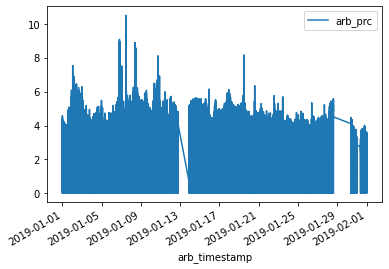

In [26]:
df['arb_timestamp'] = df['arb_timestamp'].astype('datetime64[ns]')
new_df=res = df.copy(deep=True)
new_df.set_index('arb_timestamp', inplace=True)
new_df.plot()


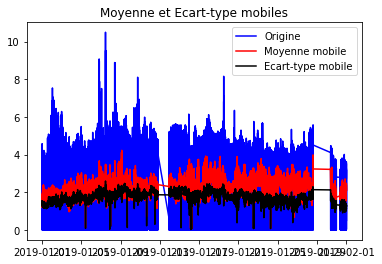

In [27]:
rolling_mean = new_df.rolling(window=38).mean()
rolling_mean
rolling_std = new_df.rolling(window = 38).std()
rolling_std
plt.plot(new_df, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()



In [28]:
df1 =df.set_index(pd.DatetimeIndex(df['arb_timestamp'])).resample("1T").agg('first')
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2019-01-01 00:00:00 to 2019-01-31 23:59:00
Freq: T
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   arb_timestamp  34961 non-null  datetime64[ns]
 1   arb_prc        34961 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


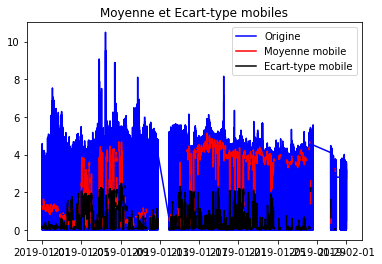

Statistique ADF : -6.615725987761774
p-value : 6.214563005520551e-09
Valeurs Critiques :
	1%: -3.4304966854305716
	5%: -2.861604831774198
	10%: -2.5668045078394472


In [29]:
rolling_mean = df1.rolling(window=38).mean()
rolling_mean
rolling_std = df1.rolling(window = 38).std()
rolling_std
plt.plot(new_df, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

df1 = df1.set_index(['arb_timestamp'])
df1 = df1.fillna(method='ffill')
result = adfuller(df1['arb_prc'])
print('Statistique ADF : {}'.format(result[0]))
# Augmented Dickey-Fuller = ADF
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
  print('\t{}: {}'.format(key, value))

In [30]:
X = df1.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1.153848, mean2=3.829135
variance1=2.198075, variance2=1.062963


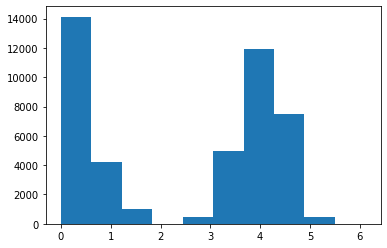

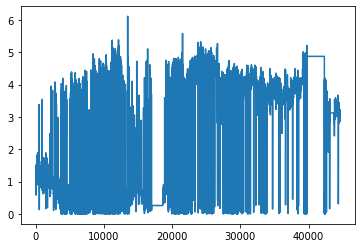

In [31]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
X = df1['arb_prc'].values
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [32]:
import signal
import time 
def signal_handler(signal, frame):
    global interrupted
    interrupted = True
signal.signal(signal.SIGINT, signal_handler)
interrupted = False

def get_stationarity(timeseries):

 # Statistiques mobiles
 rolling_mean = timeseries.rolling(window=38).mean()
 rolling_std = timeseries.rolling(window=38).std()

 # tracé statistiques mobiles
 original = plt.plot(timeseries, color='blue', label='Origine')
 mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
 std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
 plt.legend(loc='best')
 plt.title('Moyenne et écart-type Mobiles')
 plt.show(block=False)

 # Test Dickey–Fuller :
 result = adfuller(timeseries['arb_prc'])
 print('Statistiques ADF : {}'.format(result[0]))
 print('p-value : {}'.format(result[1]))
 print('Valeurs Critiques :')
 for key, value in result[4].items():
   print('\t{}: {}'.format(key, value))
   if interrupted:
        break

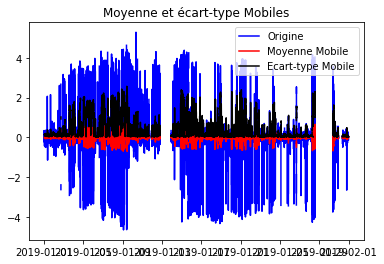

Statistiques ADF : -38.50828745924273
p-value : 0.0
Valeurs Critiques :
	1%: -3.4304967117581326
	5%: -2.861604843410121
	10%: -2.5668045140329196


In [33]:
 # soustraire la moyenne mobile
 rolling_mean = df1.rolling(window=12).mean()
 df_minus_mean = df1 - rolling_mean
 df_minus_mean.dropna(inplace=True)
 get_stationarity(df_minus_mean)

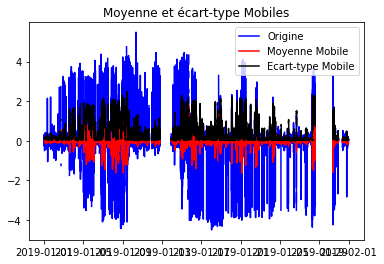

Statistiques ADF : -32.807749345043966
p-value : 0.0
Valeurs Critiques :
	1%: -3.4304966755601725
	5%: -2.861604827411804
	10%: -2.566804505517468


In [34]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# la décroissance exponentielle
rolling_mean_exp_decy = df1.ewm(halflife = 12, min_periods=0, adjust= True).mean()
df_exp_decay = df1 - rolling_mean_exp_decy
df_exp_decay.dropna(inplace=True)
get_stationarity(df_exp_decay)

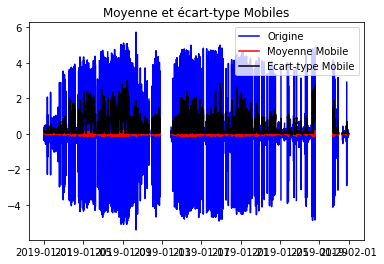

Statistiques ADF : -39.223526912490534
p-value : 0.0
Valeurs Critiques :
	1%: -3.430496688721
	5%: -2.8616048332284603
	10%: -2.56680450861351


In [35]:
# le décalage temporel
df_log_shift = df1 - df1.shift()
df_log_shift.dropna(inplace = True)
get_stationarity(df_log_shift)

In [36]:
import statsmodels.api as sm
decompfreq = 6*12
decomposition = sm.tsa.seasonal_decompose(df_exp_decay.values,freq=decompfreq)

                      arb_prc
arb_timestamp                
2019-01-01 00:00:31  0.000000
2019-01-01 00:01:14  0.097113
2019-01-01 00:02:36 -0.092482
2019-01-01 00:03:18 -0.045483
2019-01-01 00:04:44 -0.105170


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


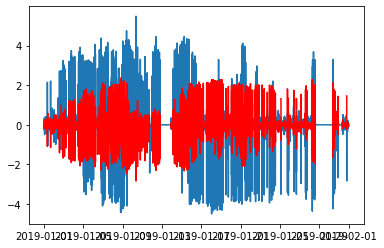

In [37]:
#Modèle Auto-Régressif (AR, MA, ARIMA) 
print(df_exp_decay.head())
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
df_exp_decay = pd.DataFrame(data=df_exp_decay.values, index=pd.date_range(start=datetime(2019, 1, 1,0,0), 
                                                              end =datetime(2019, 1, 31,23,59), freq='1T'), columns=['arb_prc'])
model = ARIMA(df1, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_exp_decay)
plt.plot(results.fittedvalues, color='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


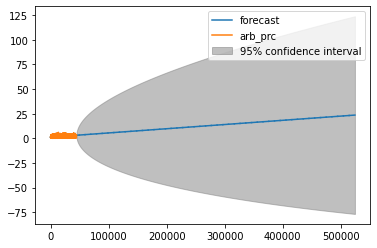

In [38]:
fig = results.plot_predict(1,524160)